# Module 1: Exploratory Data Analysis (EDA)
### Concepts
- Types of variables
- Distributions
- Corrrelation/Association
- Plotting (Histograms, Box plots, Scatter Plots)
- Summary statistics

#### In this module, we will learn how to explore, decribe, characterize, and transform data sets in preparation for regression (or machine learning). 
- https://github.com/OpenIntroStat/openintro-statistics-learn-obj/blob/master/README.md

In [ ]:
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv
#Resource: https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib as mp
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('/Users/lindseyclark/Desktop/winequality-red.csv')

In [ ]:
dataProfile = ProfileReport(dataset, title='Profile of Red Wine Quality')

In [ ]:
dataProfile

In [ ]:
ax1 = dataset.plot.scatter(x='pH',
                      y='fixed acidity',
                      c='DarkBlue')

In [ ]:
boxplot = dataset.boxplot(column=['citric acid'])

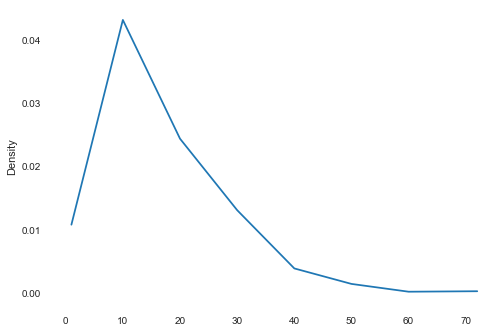

In [4]:
fsd = pd.Series(dataset['free sulfur dioxide'].values)
ax = fsd.plot.kde(ind=[1, 10, 20, 30, 40, 50, 60, 72])

In [ ]:
x = dataset['free sulfur dioxide'].to_numpy()

In [ ]:
x

In [ ]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [ ]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  bins=10,
                  kde=False,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [ ]:
from scipy.stats import gamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

In [ ]:
#x = np.linspace(gamma.ppf(0.01, a),
 #               gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

In [ ]:
rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))
True

In [ ]:
r = gamma.rvs(a, size=1000)

In [ ]:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 30000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

In [ ]:
y